### Sebastián Rodríguez
### Carnet: 20003076


# Proyecto#1: Ciencia de datos en Python

In [16]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt
%reload_ext tensorboard

In [17]:
data = np.load("proyecto_training_data.npy")

datodiv, variable = data.shape
(datodiv, variable)
ent_datodiv = int(datodiv*0.8)
Ytrain = data[:ent_datodiv, 0]
Xtrain = data[:ent_datodiv, 1]
Ytest = data[ent_datodiv:, 0]
Xtest = data[ent_datodiv:, 1]
#data.ndim
#len(data)
#data.itemsize 
#data
data.shape

(1460, 6)

In [18]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W = tf.Variable(tf.constant(1.), name = "W") 
b = tf.Variable(tf.constant(0.), name = "b") 
lr = tf.placeholder(tf.float32)


In [19]:
Yhat = tf.add(tf.multiply(X, W), b) 
cost = tf.reduce_sum(tf.pow(Yhat-Y, 2)) / (2 * ent_datodiv) 
optimizer = tf.train.GradientDescentOptimizer(lr).minimize(cost) 
init = tf.global_variables_initializer() 
testSummary = tf.summary.scalar(name='Costo', tensor = cost)

In [29]:
logs_dir = r"C:\Users\Sebastián\Documents\Galileo\2do Ciclo\Statistical Learning\Tarea práctica 1\logs"

def entrenarModLin(x, y, training_epochs, learning_rate, imp):
    with tf.Session() as sess: 
        writer = tf.summary.FileWriter(logs_dir, sess.graph)

        sess.run(init) 
        for epoch in range(training_epochs): 
            for (_x, _y) in zip(x, y): 
                sess.run(optimizer, feed_dict = {X : _x, Y : _y, lr : learning_rate}) 
            if (epoch + 1) % imp == 0: 

                c = sess.run(cost, feed_dict = {X : Xtrain, Y : Ytrain}) 
                print("Epoch", (epoch + 1), ": Costo =", c, "W =", sess.run(W), "b =", sess.run(b)) 
            summary = sess.run(testSummary, feed_dict = {X : x, Y : y})
            writer.add_summary(summary, epoch)
        training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
        weight = sess.run(W) 
        bias = sess.run(b) 
        return (weight, bias, training_cost)

In [21]:
def graficos(weight, bias, costo):
    predictions = weight * Xtrain + bias 
    print("Costo =", costo, "Pendiente =", weight, "Intercepto =", bias, '\n') 
    fig = plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
    plt.scatter(Xtrain, Ytrain, label = 'Valor Ref')
    plt.ylabel("Precio");
    plt.plot(Xtrain, predictions, 'r', label ='Ajuste')  
    plt.legend() 
    plt.show()

# HIPÓTESIS

Para valores de Lr muy elevados pueden causar error y sin necesidad de realizarlos sabemos que el costo aumentarìa para cada caso en que x>0.1. 
Lo mismo sucede para valores muy pequeños el cual se dará un pequeño ejemplo al final del notebook. Esto computacionalmente también es muy trabajoso ya que requerirá más tiempo para converger a un resultado. 

Se probarán los epochs que hemos usado en el proyecto 1 del curso de ciencia de datos en python con el fin de ver que efecto se tiene sobre el LR aunque sabemos que se necesitarán de 10 iteraciones para esto de antemano. 

# ENTRENAMIENTO

## lr = 0.1

In [22]:
weight, bias, costo = entrenarModLin(Xtrain, Ytrain, training_epochs=100, learning_rate=1, imp=10)

Epoch 10 : Costo = 1258214300.0 W = 34750.074 b = -34050.418
Epoch 20 : Costo = 1195145900.0 W = 38613.562 b = -57953.074
Epoch 30 : Costo = 1170240400.0 W = 41018.926 b = -72834.63
Epoch 40 : Costo = 1160300800.0 W = 42516.504 b = -82099.86
Epoch 50 : Costo = 1156270100.0 W = 43448.863 b = -87868.18
Epoch 60 : Costo = 1154597100.0 W = 44029.336 b = -91459.49
Epoch 70 : Costo = 1153879600.0 W = 44390.688 b = -93695.04
Epoch 80 : Costo = 1153558700.0 W = 44615.69 b = -95087.14
Epoch 90 : Costo = 1153407400.0 W = 44755.746 b = -95953.664
Epoch 100 : Costo = 1153332100.0 W = 44842.973 b = -96493.24


Costo = Tensor("truediv_1:0", shape=(), dtype=float32) Pendiente = 44842.973 Intercepto = -96493.24 



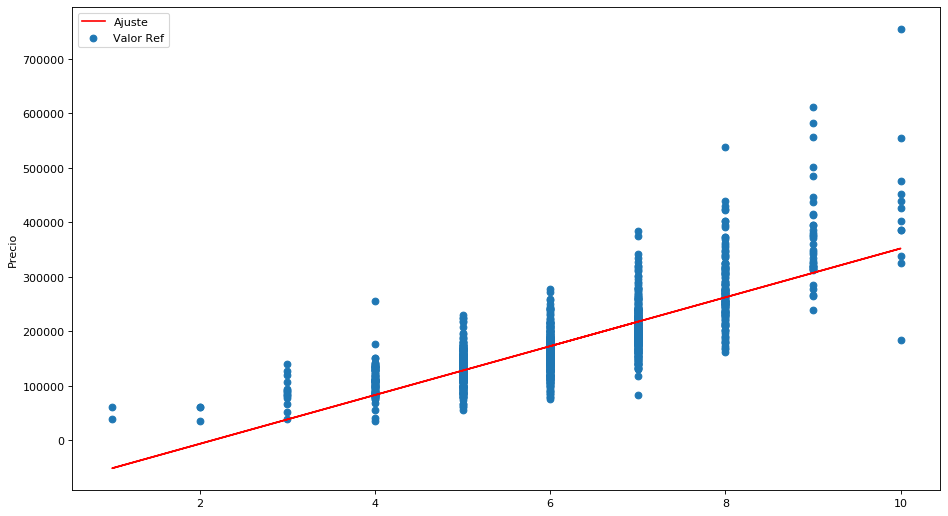

In [23]:
graficos(weight, bias, cost)

# ENTRENAMIENTO

## lr = 0.001

In [24]:
weight, bias, costo = entrenarModLin(Xtrain, Ytrain, training_epochs=100, learning_rate=0.001, imp=10)

Epoch 10 : Costo = 9477633000.0 W = 9788.876 b = 1479.1666
Epoch 20 : Costo = 5021543400.0 W = 16347.494 b = 2454.1812
Epoch 30 : Costo = 3021892900.0 W = 20743.13 b = 3091.4978
Epoch 40 : Costo = 2124453400.0 W = 23689.904 b = 3502.629
Epoch 50 : Costo = 1721591000.0 W = 25666.143 b = 3762.2644
Epoch 60 : Costo = 1540637000.0 W = 26992.445 b = 3920.4265
Epoch 70 : Costo = 1459287400.0 W = 27883.234 b = 4010.6387
Epoch 80 : Costo = 1422633200.0 W = 28482.36 b = 4055.3208
Epoch 90 : Costo = 1406041100.0 W = 28886.137 b = 4069.5227
Epoch 100 : Costo = 1398455200.0 W = 29159.107 b = 4063.3013


Costo = Tensor("truediv_1:0", shape=(), dtype=float32) Pendiente = 29159.107 Intercepto = 4063.3013 



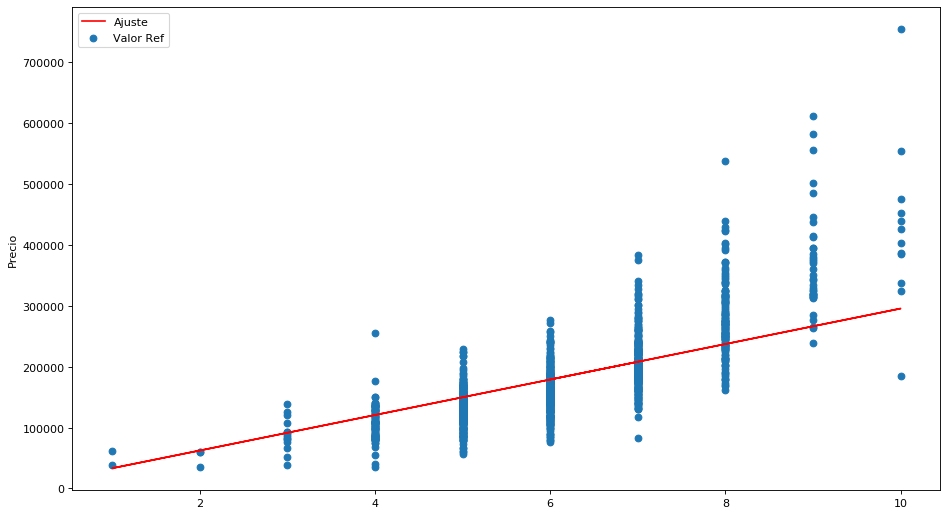

In [25]:
graficos(weight, bias, cost)

# ENTRENAMIENTO

## lr = 0.0001

In [26]:
weight, bias, costo = entrenarModLin(Xtrain, Ytrain, training_epochs=100, learning_rate=0.0001, imp=10)

Epoch 10 : Costo = 18021145000.0 W = 1165.4261 b = 176.91632
Epoch 20 : Costo = 16740613000.0 W = 2284.1416 b = 346.69467
Epoch 30 : Costo = 15558708000.0 W = 3358.9338 b = 509.61752
Epoch 40 : Costo = 14467808000.0 W = 4391.5586 b = 665.9522
Epoch 50 : Costo = 13460931000.0 W = 5383.645 b = 815.95337
Epoch 60 : Costo = 12531596000.0 W = 6336.794 b = 959.87994
Epoch 70 : Costo = 11673852000.0 W = 7252.5127 b = 1097.967
Epoch 80 : Costo = 10882158000.0 W = 8132.3003 b = 1230.4393
Epoch 90 : Costo = 10151422000.0 W = 8977.576 b = 1357.5203
Epoch 100 : Costo = 9476968000.0 W = 9789.671 b = 1479.4221


Costo = Tensor("truediv_1:0", shape=(), dtype=float32) Pendiente = 9789.671 Intercepto = 1479.4221 



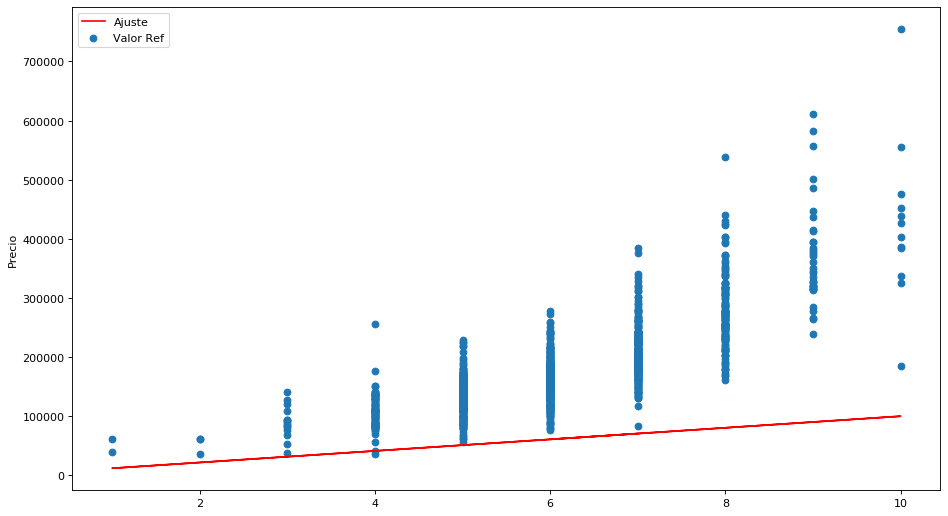

In [27]:
graficos(weight, bias, cost)

# ENTRENAMIENTO

## lr = 0.00001

In [28]:
weight, bias, costo = entrenarModLin(Xtrain, Ytrain, training_epochs=100, learning_rate=0.00001, imp=10)

Epoch 10 : Costo = 19264735000.0 W = 119.553406 b = 18.021257
Epoch 20 : Costo = 19122086000.0 W = 237.6331 b = 35.96849
Epoch 30 : Costo = 18980581000.0 W = 355.23904 b = 53.84212
Epoch 40 : Costo = 18840200000.0 W = 472.3755 b = 71.64235
Epoch 50 : Costo = 18700937000.0 W = 589.0472 b = 89.36962
Epoch 60 : Costo = 18562791000.0 W = 705.24786 b = 107.02392
Epoch 70 : Costo = 18425745000.0 W = 820.9848 b = 124.605675
Epoch 80 : Costo = 18289801000.0 W = 936.25916 b = 142.11578
Epoch 90 : Costo = 18154932000.0 W = 1051.0773 b = 159.55211
Epoch 100 : Costo = 18021132000.0 W = 1165.4387 b = 176.91916


In [49]:
graficos(weight, bias, cost)

Costo = Tensor("truediv_3:0", shape=(), dtype=float32) Pendiente = 1165.4387 Intercepto = 176.91916 



In [31]:
%tensorboard --logdir="C:\Users\Sebastián\Documents\Galileo\2do Ciclo\Statistical Learning\Tarea práctica 1\logs"

Reusing TensorBoard on port 6006 (pid 4124), started 0:19:23 ago. (Use '!kill 4124' to kill it.)

In [30]:
%tensorboard --logdir="C:\Users\Sebastián\Documents\Galileo\2do Ciclo\Statistical Learning\Tarea práctica 1\logs"

Reusing TensorBoard on port 6006 (pid 4124), started 0:19:04 ago. (Use '!kill 4124' to kill it.)

# Conclusión

Se puede observar un menor valor en Lr de 0.1 en comparación del resto. Como se había predicho en la hipótesis para valores lr > 1 & lr <0.01 notamos como los valores son muy grandes o extremadamente pequeños lo cual no nos es de utilidad para la necesidad de este ejercicio o en general. 

Vemos una mejora para el valor de 0.1 y 0.01 que serían los lr que yo personalmente utilizaría.